In [0]:
#Importamos las librerias necesarias
# Pandas para poder trabajar los dataframes
import pandas as pd
# Numpy para el calculo numerico o lineal
import numpy as np
# La clase para crear la red Neuronal
from sklearn.neural_network import MLPRegressor
# Label encoder para poder transformar los datos de 
# texto a numerico en donde cada nombre tiene un id unico numerico
from sklearn.preprocessing import LabelEncoder
# El imputer para las variables donde hay valores nulos
from sklearn.impute import SimpleImputer
# Matplotlib para los graficos
import matplotlib.pyplot as plt
# Datetime para poder transformar las fechas de texto a timestamp
from datetime import datetime
# Train test split es una funcion para separar los datos de prueba y de entrenamiento ademas que los mezcla
from sklearn.model_selection import train_test_split
# R2 Score para medir la metrica de que tan bueno fue el modelo en un score donde 1 es 100%
from sklearn.metrics import r2_score
# Mean Absolute Error para la media de el error absoluto
from sklearn.metrics import mean_absolute_error
# Joblib para cuando termine el modelo y poderlo exportar
import joblib
# PCA para reducir la dimension de el dataframe o la matriz de datos
from sklearn.decomposition import PCA
# El backend de matplotlib para exportar a pdf
from matplotlib.backends.backend_pdf import PdfPages

In [0]:
# Cargamos los datos en 2 dataframes porque uno lo exportaremos a pdf
df_pdf = pd.read_csv("ebola_2014_2016_clean.csv")
df = pd.read_csv("ebola_2014_2016_clean.csv")

In [127]:
# Vemos los datos que tenemos y sus variables, en donde tenemos en pais, la fecha, el numero de casos sospechosos
# Numero de casos probables, numero de casos confirmados, numero de casos probables y sosprechosos, numero de posibles muertes
# El dato a predecir es el numero de casos probables y los sospechosos de muerte
df.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [0]:
# Ahora bien los paises deben de convertirse a numericos porque asi nuestra red neuronal no lo entiende
label_encoder = LabelEncoder()

In [0]:
# Ahora vamos a convertir con un label encoder lo que hara es que cada nombre le dara un id secuencial
df["Country"] = label_encoder.fit_transform(df["Country"])

In [0]:
# Ahora las fechas son texto y tampoco la puede entender por lo que la cambiamos a numerico
df["Date"] = df["Date"].apply(lambda f: datetime.timestamp(pd.Timestamp(f).to_pydatetime()))

In [0]:
# Hay algunos paises que les hace falta informacion por lo que debemos 
# rellenarla porque una red neuronal no la entiende en mi caso usare la media como estrategia
def imputar_variable(data):
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  return imp.fit_transform(data)

In [0]:
# Luego imputamos los datos y sobreescribimos el dataframe
df = pd.DataFrame(data=imputar_variable(df), columns=df.columns)

In [0]:
# Ahora que ya preprocesamos los datos los tenemos que separar
var_x = ["Country", "Date", "No. of suspected cases", "No. of probable cases", "No. of confirmed cases", "No. of confirmed, probable and suspected cases", "No. of suspected deaths", "No. of probable deaths", "No. of confirmed deaths"]
X = df[var_x].values

var_y = ["No. of confirmed, probable and suspected deaths"]
Y = df[var_y].values

In [0]:
# Separamos los datos de entrenamiento y de pruebas con un tamaño de 33% para prueba y 67% de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
# Podemos ver un poco la documentacion de la funcion de el perceptron multicapa
# Init signature: MLPRegressor(*args, **kwargs)
# Docstring:     
# Multi-layer Perceptron regressor.

# This model optimizes the squared-loss using LBFGS or stochastic gradient
# descent.

# .. versionadded:: 0.18

# Parameters
# ----------
# hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
#     The ith element represents the number of neurons in the ith
#     hidden layer.

# activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
#     Activation function for the hidden layer.

#     - 'identity', no-op activation, useful to implement linear bottleneck,
#       returns f(x) = x

#     - 'logistic', the logistic sigmoid function,
#       returns f(x) = 1 / (1 + exp(-x)).

#     - 'tanh', the hyperbolic tan function,
#       returns f(x) = tanh(x).

#     - 'relu', the rectified linear unit function,
#       returns f(x) = max(0, x)

# solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
#     The solver for weight optimization.

#     - 'lbfgs' is an optimizer in the family of quasi-Newton methods.

#     - 'sgd' refers to stochastic gradient descent.

#     - 'adam' refers to a stochastic gradient-based optimizer proposed by
#       Kingma, Diederik, and Jimmy Ba

#     Note: The default solver 'adam' works pretty well on relatively
#     large datasets (with thousands of training samples or more) in terms of
#     both training time and validation score.
#     For small datasets, however, 'lbfgs' can converge faster and perform
#     better.

# alpha : float, default=0.0001
#     L2 penalty (regularization term) parameter.

# batch_size : int, default='auto'
#     Size of minibatches for stochastic optimizers.
#     If the solver is 'lbfgs', the classifier will not use minibatch.
#     When set to "auto", `batch_size=min(200, n_samples)`

# learning_rate : {'constant', 'invscaling', 'adaptive'}, default='constant'
#     Learning rate schedule for weight updates.

#     - 'constant' is a constant learning rate given by
#       'learning_rate_init'.

#     - 'invscaling' gradually decreases the learning rate ``learning_rate_``
#       at each time step 't' using an inverse scaling exponent of 'power_t'.
#       effective_learning_rate = learning_rate_init / pow(t, power_t)

#     - 'adaptive' keeps the learning rate constant to
#       'learning_rate_init' as long as training loss keeps decreasing.
#       Each time two consecutive epochs fail to decrease training loss by at
#       least tol, or fail to increase validation score by at least tol if
#       'early_stopping' is on, the current learning rate is divided by 5.

#     Only used when solver='sgd'.

# learning_rate_init : double, default=0.001
#     The initial learning rate used. It controls the step-size
#     in updating the weights. Only used when solver='sgd' or 'adam'.

# power_t : double, default=0.5
#     The exponent for inverse scaling learning rate.
#     It is used in updating effective learning rate when the learning_rate
#     is set to 'invscaling'. Only used when solver='sgd'.

# max_iter : int, default=200
#     Maximum number of iterations. The solver iterates until convergence
#     (determined by 'tol') or this number of iterations. For stochastic
#     solvers ('sgd', 'adam'), note that this determines the number of epochs
#     (how many times each data point will be used), not the number of
#     gradient steps.

# shuffle : bool, default=True
#     Whether to shuffle samples in each iteration. Only used when
#     solver='sgd' or 'adam'.

# random_state : int, RandomState instance or None, default=None
#     If int, random_state is the seed used by the random number generator;
#     If RandomState instance, random_state is the random number generator;
#     If None, the random number generator is the RandomState instance used
#     by `np.random`.

# tol : float, default=1e-4
#     Tolerance for the optimization. When the loss or score is not improving
#     by at least ``tol`` for ``n_iter_no_change`` consecutive iterations,
#     unless ``learning_rate`` is set to 'adaptive', convergence is
#     considered to be reached and training stops.

# verbose : bool, default=False
#     Whether to print progress messages to stdout.

# warm_start : bool, default=False
#     When set to True, reuse the solution of the previous
#     call to fit as initialization, otherwise, just erase the
#     previous solution. See :term:`the Glossary <warm_start>`.

# momentum : float, default=0.9
#     Momentum for gradient descent update.  Should be between 0 and 1. Only
#     used when solver='sgd'.

# nesterovs_momentum : boolean, default=True
#     Whether to use Nesterov's momentum. Only used when solver='sgd' and
#     momentum > 0.

# early_stopping : bool, default=False
#     Whether to use early stopping to terminate training when validation
#     score is not improving. If set to true, it will automatically set
#     aside 10% of training data as validation and terminate training when
#     validation score is not improving by at least ``tol`` for
#     ``n_iter_no_change`` consecutive epochs.
#     Only effective when solver='sgd' or 'adam'

# validation_fraction : float, default=0.1
#     The proportion of training data to set aside as validation set for
#     early stopping. Must be between 0 and 1.
#     Only used if early_stopping is True

# beta_1 : float, default=0.9
#     Exponential decay rate for estimates of first moment vector in adam,
#     should be in [0, 1). Only used when solver='adam'

# beta_2 : float, default=0.999
#     Exponential decay rate for estimates of second moment vector in adam,
#     should be in [0, 1). Only used when solver='adam'

# epsilon : float, default=1e-8
#     Value for numerical stability in adam. Only used when solver='adam'

# n_iter_no_change : int, default=10
#     Maximum number of epochs to not meet ``tol`` improvement.
#     Only effective when solver='sgd' or 'adam'

#     .. versionadded:: 0.20

# max_fun : int, default=15000
#     Only used when solver='lbfgs'. Maximum number of function calls.
#     The solver iterates until convergence (determined by 'tol'), number
#     of iterations reaches max_iter, or this number of function calls.
#     Note that number of function calls will be greater than or equal to
#     the number of iterations for the MLPRegressor.

#     .. versionadded:: 0.22

# Attributes
# ----------
# loss_ : float
#     The current loss computed with the loss function.

# coefs_ : list, length n_layers - 1
#     The ith element in the list represents the weight matrix corresponding
#     to layer i.

# intercepts_ : list, length n_layers - 1
#     The ith element in the list represents the bias vector corresponding to
#     layer i + 1.

# n_iter_ : int,
#     The number of iterations the solver has ran.

# n_layers_ : int
#     Number of layers.

# n_outputs_ : int
#     Number of outputs.

# out_activation_ : string
#     Name of the output activation function.

# Notes
# -----
# MLPRegressor trains iteratively since at each time step
# the partial derivatives of the loss function with respect to the model
# parameters are computed to update the parameters.

# It can also have a regularization term added to the loss function
# that shrinks model parameters to prevent overfitting.

# This implementation works with data represented as dense and sparse numpy
# arrays of floating point values.

# References
# ----------
# Hinton, Geoffrey E.
#     "Connectionist learning procedures." Artificial intelligence 40.1
#     (1989): 185-234.

# Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of
#     training deep feedforward neural networks." International Conference
#     on Artificial Intelligence and Statistics. 2010.

# He, Kaiming, et al. "Delving deep into rectifiers: Surpassing human-level
#     performance on imagenet classification." arXiv preprint
#     arXiv:1502.01852 (2015).

# Kingma, Diederik, and Jimmy Ba. "Adam: A method for stochastic
#     optimization." arXiv preprint arXiv:1412.6980 (2014).
# File:           /usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py
# Type:           ABCMeta
MLPRegressor?

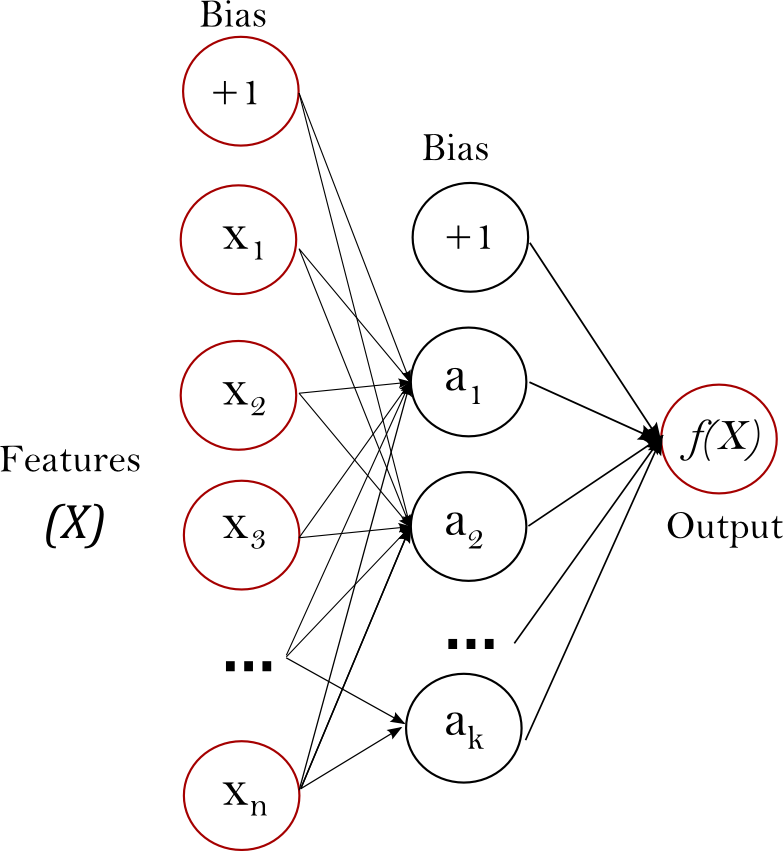

In [202]:
# Desplegaremos la imagen del perceptron multicapa
from IPython.display import Image
Image(filename='multilayerperceptron_network.png') 

In [167]:
# Creamos la red neuronal donde le pasamos los siguientes parametros
# La cantidad de capas de entrada es igual a 8 porque tenemos 8 parametros de el dataset y luego 10 capas ocultas
# La funcion de activacion que usaremos es es relu
# La funcion de optimizacion que usaremos es es adam porque es la que mejor se ajusta
# El batch sera automatico
# El ratio de aprendizaje es del 0.01 y constante
# Haremos 1000 Iteraciones para minimizar el error que se obtendra con la funcion adam tambien esta el decenso del gradiente pero andava mal
model_neural_network = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

# Entrenamos la red neuronal, es donde se hace propagacion hacia adelante haciendo ponderaciones, 
# luego con la propagacion de error se hace hacia atras si es que hubo error calculando las derivadas parciales 
# Asi hasta que se hacen de manera que al estar el modelo se tiene el valor de los pesos
model_neural_network.fit(X_train, Y_train)

# Predecimos los valores 
y_pred = model_neural_network.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [181]:
# Ahora bien ya teniendo los datos del modelo, hay 8 parametros de entrada y eso no lo podemos visualizar porque esta en 8 dimensiones
# Vamos a reducir las dimensiones a 1 sola porque asi tendriamos el valor de x e y seria el que predeciriamos asi podemos ver un grafico
pca = PCA(n_components=1)
pca.fit_transform(X)

array([[-24448731.46731904],
       [-24448731.47856915],
       [-24448731.46025712],
       ...,
       [ 24972068.5082341 ],
       [ 24972068.50851052],
       [ 24972068.50823293]])

In [187]:
# Reducimos las dimensiones de las matrices que son X del dataset y X reducida
x_reduce = pca.transform(X)
x_test_reduce = pca.transform(X_test)

print(x_reduce.shape)
print(x_test_reduce.shape)

print(X.shape)
print(X_test.shape)

(2485, 1)
(821, 1)
(2485, 9)
(821, 9)


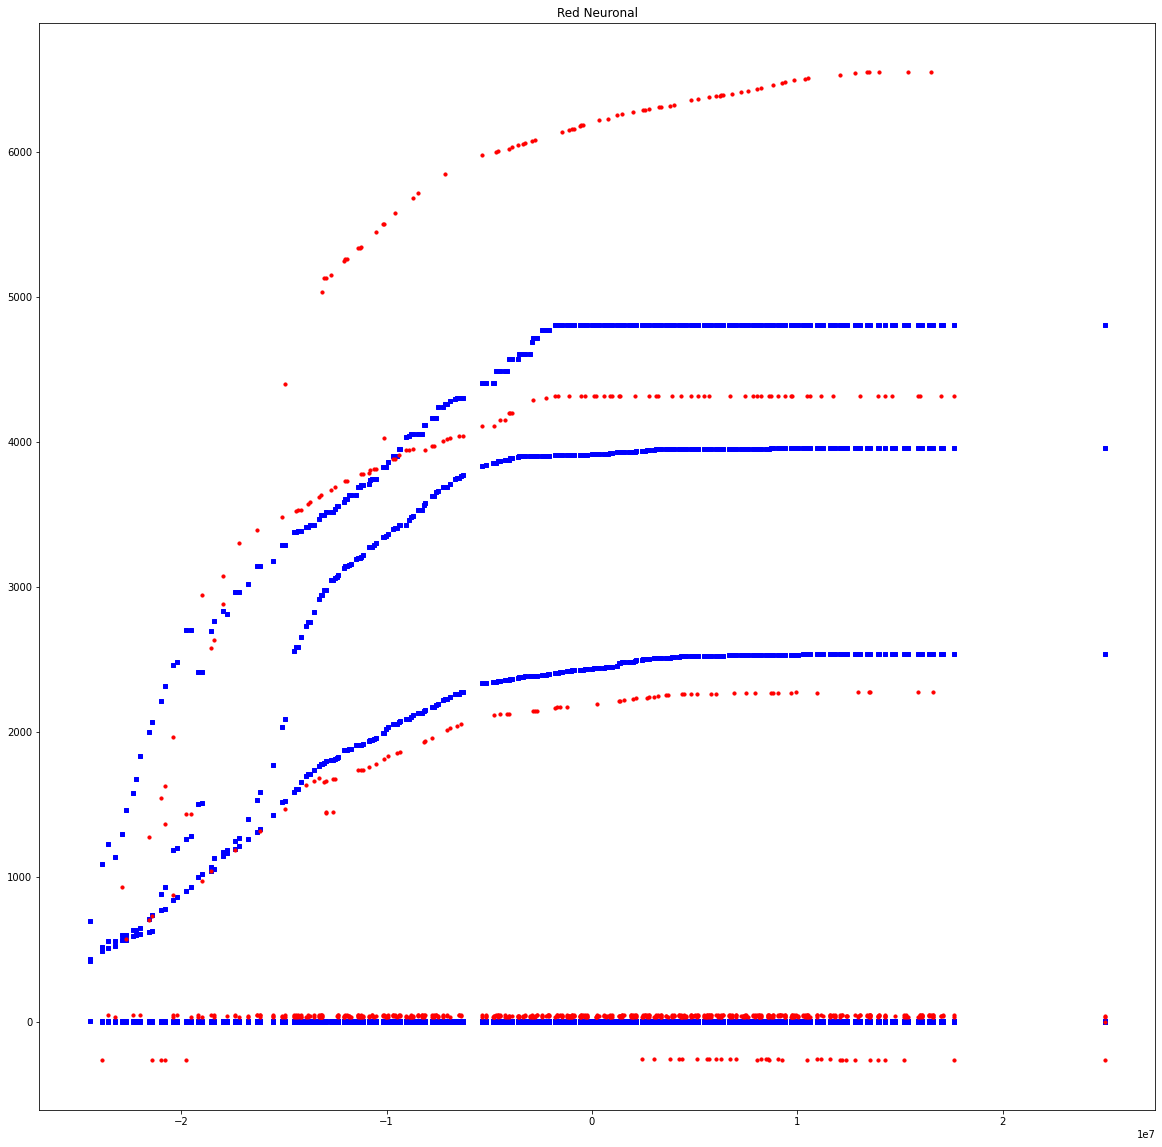

R2 Score 0.8109227072358473
Mean Absolute Error 317.2028555904449


In [189]:
# Ahroa mostramos el grafico que deseamos
fig = plt.figure()
ax1 = fig.add_subplot(111)

fig.set_figwidth(20)
fig.set_figheight(20)

ax1.scatter(x_reduce, Y, s=10, c='b', marker="s", label='real')
ax1.scatter(x_test_reduce, y_pred, s=10, c='r', marker="o", label='NN Prediction')

plt.title("Red Neuronal")
plt.savefig("neural_network_metrics_pca.jpg")
plt.show()

# Mostramos los datos del resultado del modelo haber que tal anduvo
print(f"R2 Score {r2_score(Y_test, y_pred)}")
print(f"Mean Absolute Error {mean_absolute_error(Y_test, y_pred)}")

In [171]:
# Guardamos el modelo
joblib.dump(model_neural_network, "model_neural_network_predict_death_ebola.sav")

['model_neural_network_predict_death_ebola.sav']

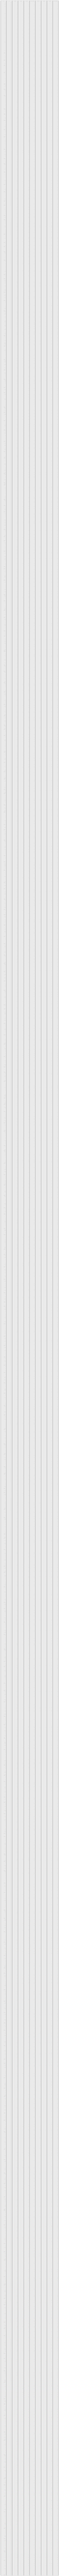

In [199]:
# Guardamos el dataset en un pdf
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df_pdf.values,colLabels=df_pdf.columns,loc='center')

pp = PdfPages("ebola_2014_1016.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()